### Coursework - Dubai CW PG Thursday 6

#### Exploratory Data Analysis (EDA) and Data Visualization

In [1]:
#import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#upload the complete dataset

X_train = pd.read_csv('../../dataset/CompleteDataSet/x_train_all.csv')
y_train = pd.read_csv('../../dataset/CompleteDataSet/y_train_all.csv')
X_test = pd.read_csv('../../dataset/CompleteDataSet/x_test_all.csv')
y_test = pd.read_csv('../../dataset/CompleteDataSet/y_test_all.csv')

In [3]:
X_train.shape, y_train.shape

((9690, 2304), (9690, 1))

In [4]:
#target class

y_train.value_counts()

0
2    2250
1    2220
4    1980
3    1410
8     540
6     360
9     270
7     240
0     210
5     210
Name: count, dtype: int64

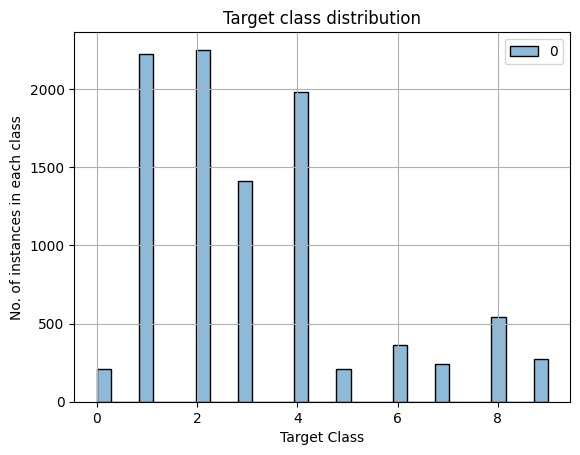

In [5]:
sns.histplot(y_train)
plt.title('Target class distribution')
plt.xlabel('Target Class')
plt.ylabel('No. of instances in each class')
plt.grid(True)
plt.show()

#### Running Classifiers on initial dataset

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# example of evaluating a decision tree with random oversampling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
score = np.mean(scores)
print(f"Accuracy: {score:.1%}")


Accuracy: 97.8%



Testing Classifier: GaussianNB


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Test metrics for GaussianNB:
Accuracy: 17.2%
Precision: 36.7%
Recall: 17.2%
F1 Score: 22.5%


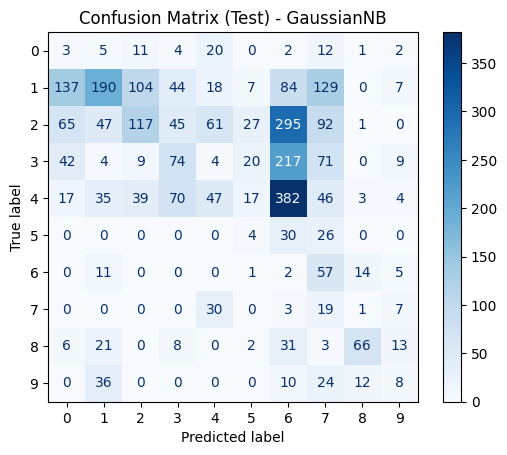


Testing Classifier: SVM


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Test metrics for SVM:
Accuracy: 70.9%
Precision: 72.4%
Recall: 70.9%
F1 Score: 70.3%


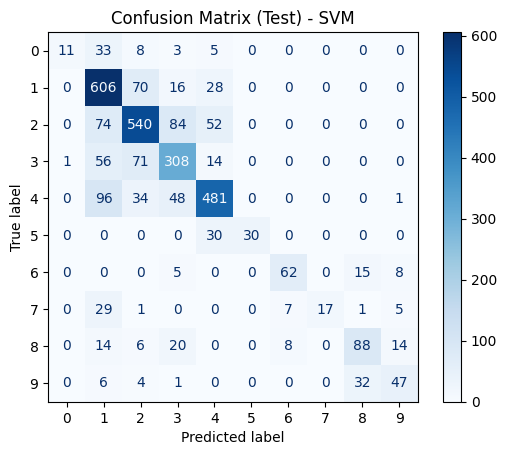


Testing Classifier: DecisionTreeClassifier

Test metrics for DecisionTreeClassifier:
Accuracy: 68.5%
Precision: 68.6%
Recall: 68.5%
F1 Score: 68.4%


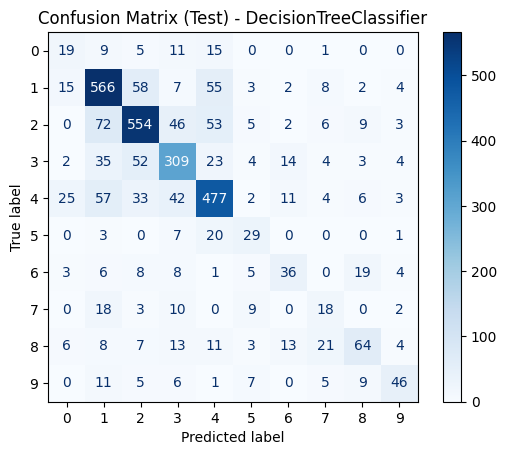


Testing Classifier: RandomForestClassifier


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Test metrics for RandomForestClassifier:
Accuracy: 77.5%
Precision: 78.1%
Recall: 77.5%
F1 Score: 76.7%


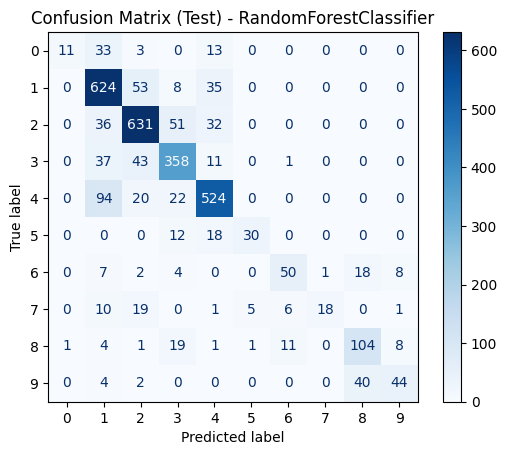


Testing Classifier: LogisticRegression


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Test metrics for LogisticRegression:
Accuracy: 87.8%
Precision: 88.0%
Recall: 87.8%
F1 Score: 87.3%


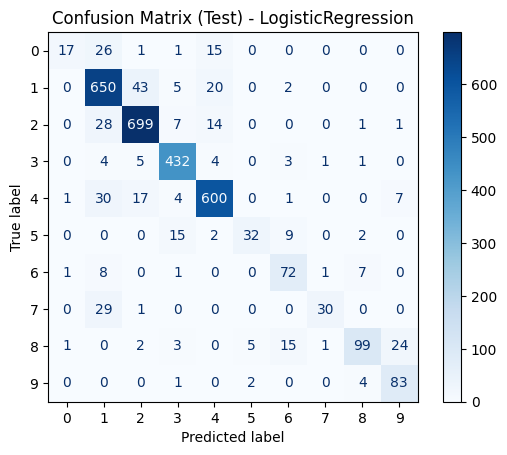

In [8]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Define classifiers
classifiers = {
    'GaussianNB': GaussianNB(),
    'SVM': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Train and test classifiers
for clf_name, clf in classifiers.items():
    print(f"\nTesting Classifier: {clf_name}\n{'='*30}")
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the classifier on the test set
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred, average='weighted')
    recall_test = recall_score(y_test, y_pred, average='weighted')
    f1_test = f1_score(y_test, y_pred, average='weighted')

    print(f"\nTest metrics for {clf_name}:")
    print(f"Accuracy: {accuracy_test:.1%}")
    print(f"Precision: {precision_test:.1%}")
    print(f"Recall: {recall_test:.1%}")
    print(f"F1 Score: {f1_test:.1%}")

    # Plot confusion matrix for the test set
    cm_test = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.unique(y_test))
    disp_test.plot(cmap='Blues', values_format='.0f')
    plt.title(f'Confusion Matrix (Test) - {clf_name}')
    plt.show()


#### Random Over Sampling (ROS)

In [9]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of SMOTE
ros = RandomOverSampler(random_state=42)

# Fit and apply the transform
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# Print the count of each class after SMOTE
print(y_ros.value_counts())

0
0    2250
1    2250
2    2250
3    2250
4    2250
5    2250
6    2250
7    2250
8    2250
9    2250
Name: count, dtype: int64


#### Random Under Sampling (RUS)

In [10]:
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of SMOTE
rus = RandomUnderSampler(random_state=42)

# Fit and apply the transform
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Print the count of each class after SMOTE
print(y_rus.value_counts())

0
0    210
1    210
2    210
3    210
4    210
5    210
6    210
7    210
8    210
9    210
Name: count, dtype: int64


#### SMOTE Over Sampling

In [11]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and apply the transform
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Print the count of each class after SMOTE
print(y_smote.value_counts())

0
0    2250
1    2250
2    2250
3    2250
4    2250
5    2250
6    2250
7    2250
8    2250
9    2250
Name: count, dtype: int64


#### SMOTEENN

In [12]:
from imblearn.combine import SMOTEENN

# Create an instance of SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Fit and apply the transform
X_smoteenn, y_smoteenn = smote_enn.fit_resample(X_train, y_train)

# Print the count of each class after combination
print(y_smoteenn.value_counts())


0
0    2250
5    2250
7    2250
9    2249
6    2247
8    2241
3    2049
4    1966
1    1858
2    1812
Name: count, dtype: int64


#### Balancing with SMOTE and Under Sampling at 50% original dataset

In [13]:
#smote and rus to 50%

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Get the count of the majority class
max_count = y_train.value_counts().max()

# Define oversampling strategy with SMOTE for specific classes
sampling_strategy = {8: max_count // 2, 6: max_count // 2, 9: max_count // 2, 7: max_count // 2, 0: max_count // 2, 5: max_count // 2}
oversample = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Apply SMOTE oversampling
X_smote1, y_smote1 = oversample.fit_resample(X_train, y_train)

# Display class distribution after SMOTE oversampling
print(y_smote1.value_counts())

# Define desired number of samples for undersampling
desired_samples = min(y_smote1.value_counts())

# Create a dictionary with the desired number of samples for each class
sampling_strategy = {label: desired_samples for label in range(10)}

# Instantiate RandomUnderSampler with the specified sampling strategy
undersample = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)

# Fit and apply the transform
X_bal, y_bal = undersample.fit_resample(X_smote1, y_smote1)

# Display class distribution after combined SMOTE oversampling and random undersampling
print(y_bal.value_counts())

0
2    2250
1    2220
4    1980
3    1410
0    1125
5    1125
6    1125
7    1125
8    1125
9    1125
Name: count, dtype: int64
0
0    1125
1    1125
2    1125
3    1125
4    1125
5    1125
6    1125
7    1125
8    1125
9    1125
Name: count, dtype: int64


#### 10-Fold Cross Validation

In [14]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

datasets = [('Random Oversampling', X_ros, y_ros),
            ('Random Undersampling', X_rus, y_rus),
            ('SMOTE Oversampling', X_smote, y_smote),
            ('SMOTE + Undersample', X_bal, y_bal),
            ('SMOTEENN', X_smoteenn, y_smoteenn)]

for method_name, X_resampled, y_resampled in datasets:
    # Display the current sampling method
    print(f"\nCross Validation using {method_name}")
    
    # Initialize the Random Forest classifier
    rf = RandomForestClassifier(random_state=42)
    
    # Initialize KFold for cross-validation
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Perform cross-validation
    scores = cross_val_score(rf, X_resampled, y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # Calculate and print the mean accuracy
    mean_accuracy = np.mean(scores)
    print(f"Accuracy: {mean_accuracy:.1%}")
    print(f"\n{'='*30}")



Cross Validation using Random Oversampling
Accuracy: 99.4%


Cross Validation using Random Undersampling
Accuracy: 90.7%


Cross Validation using SMOTE Oversampling
Accuracy: 99.3%


Cross Validation using SMOTE + Undersample
Accuracy: 98.2%


Cross Validation using SMOTEENN
Accuracy: 99.5%



#### Classification of resampled data

In [15]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the classifiers
classifiers = {
    'NB': GaussianNB(),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Define the datasets
datasets = {
    'ROS': (X_ros, y_ros),
    'RUS': (X_rus, y_rus),
    'SMOTE': (X_smote, y_smote),
    'Balanced': (X_bal, y_bal),
    'smoteenn': (X_smoteenn, y_smoteenn)
}

# Iterate over classifiers and datasets
for clf_name, clf in classifiers.items():
    print(f"\nTesting Classifier: {clf_name}\n{'='*30}")
    for dataset_name, (X_data, y_data) in datasets.items():
     
        # Fit the pipeline on the training data
        clf.fit(X_data, y_data)
        
        # Predict on the testing data
        y_pred = clf.predict(X_test)
        
        # Evaluate accuracy matrices on the testing data
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Display the results
        print(f'{dataset_name}: Accuracy - {accuracy:.1%}')
        print(f'{dataset_name}: Precision - {precision:.1%}')
        print(f'{dataset_name}: Recall - {recall:.1%}')
        print(f'{dataset_name}: F1 Score - {f1:.1%}')

        # Display confusion matrix using ConfusionMatrixDisplay
        # cm = confusion_matrix(testing_dataset[1], y_pred)
        # disp = ConfusionMatrixDisplay(cm)
        # disp.plot(cmap='Blues', values_format='d')
        # plt.title(f'Confusion Matrix - {clf_name} on {dataset_name}')


Testing Classifier: NB


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROS: Accuracy - 17.2%
ROS: Precision - 36.8%
ROS: Recall - 17.2%
ROS: F1 Score - 22.5%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RUS: Accuracy - 15.7%
RUS: Precision - 32.8%
RUS: Recall - 15.7%
RUS: F1 Score - 19.6%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SMOTE: Accuracy - 17.9%
SMOTE: Precision - 36.5%
SMOTE: Recall - 17.9%
SMOTE: F1 Score - 22.7%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Balanced: Accuracy - 16.8%
Balanced: Precision - 34.9%
Balanced: Recall - 16.8%
Balanced: F1 Score - 21.3%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


smoteenn: Accuracy - 17.3%
smoteenn: Precision - 35.2%
smoteenn: Recall - 17.3%
smoteenn: F1 Score - 22.0%

Testing Classifier: SVM


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROS: Accuracy - 71.6%
ROS: Precision - 72.7%
ROS: Recall - 71.6%
ROS: F1 Score - 71.4%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RUS: Accuracy - 44.1%
RUS: Precision - 52.8%
RUS: Recall - 44.1%
RUS: F1 Score - 46.4%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SMOTE: Accuracy - 71.3%
SMOTE: Precision - 72.2%
SMOTE: Recall - 71.3%
SMOTE: F1 Score - 71.1%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Balanced: Accuracy - 66.3%
Balanced: Precision - 68.0%
Balanced: Recall - 66.3%
Balanced: F1 Score - 66.4%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


smoteenn: Accuracy - 68.3%
smoteenn: Precision - 69.6%
smoteenn: Recall - 68.3%
smoteenn: F1 Score - 68.3%

Testing Classifier: Decision Tree
ROS: Accuracy - 67.1%
ROS: Precision - 67.0%
ROS: Recall - 67.1%
ROS: F1 Score - 67.0%
RUS: Accuracy - 53.5%
RUS: Precision - 56.5%
RUS: Recall - 53.5%
RUS: F1 Score - 54.4%
SMOTE: Accuracy - 67.1%
SMOTE: Precision - 66.9%
SMOTE: Recall - 67.1%
SMOTE: F1 Score - 67.0%
Balanced: Accuracy - 63.0%
Balanced: Precision - 63.2%
Balanced: Recall - 63.0%
Balanced: F1 Score - 63.1%
smoteenn: Accuracy - 64.5%
smoteenn: Precision - 64.9%
smoteenn: Recall - 64.5%
smoteenn: F1 Score - 64.5%

Testing Classifier: Random Forest


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ROS: Accuracy - 77.0%
ROS: Precision - 76.9%
ROS: Recall - 77.0%
ROS: F1 Score - 76.1%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RUS: Accuracy - 65.5%
RUS: Precision - 67.8%
RUS: Recall - 65.5%
RUS: F1 Score - 65.8%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


SMOTE: Accuracy - 77.5%
SMOTE: Precision - 77.8%
SMOTE: Recall - 77.5%
SMOTE: F1 Score - 76.9%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Balanced: Accuracy - 75.8%
Balanced: Precision - 75.9%
Balanced: Recall - 75.8%
Balanced: F1 Score - 75.2%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


smoteenn: Accuracy - 75.5%
smoteenn: Precision - 76.0%
smoteenn: Recall - 75.5%
smoteenn: F1 Score - 74.9%

Testing Classifier: Logistic Regression


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aman.n\AppData\Lo

ROS: Accuracy - 88.1%
ROS: Precision - 88.3%
ROS: Recall - 88.1%
ROS: F1 Score - 87.9%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RUS: Accuracy - 82.0%
RUS: Precision - 83.5%
RUS: Recall - 82.0%
RUS: F1 Score - 82.2%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SMOTE: Accuracy - 87.9%
SMOTE: Precision - 88.1%
SMOTE: Recall - 87.9%
SMOTE: F1 Score - 87.7%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Balanced: Accuracy - 87.6%
Balanced: Precision - 88.1%
Balanced: Recall - 87.6%
Balanced: F1 Score - 87.4%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


smoteenn: Accuracy - 87.4%
smoteenn: Precision - 87.6%
smoteenn: Recall - 87.4%
smoteenn: F1 Score - 87.2%


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### PCA on Balanced Dataset

In [16]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_pca = pca.fit_transform(X_bal)
X_pca.shape

(11250, 292)

In [17]:
pca = PCA(n_components=292)
X_test_pca = pca.fit_transform(X_test)
X_test_pca.shape

(3090, 292)

Training GaussianNB...

Test metrics for GaussianNB:
Accuracy: 0.1453
Precision: 0.2033
Recall: 0.1453
F1 Score: 0.1469


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


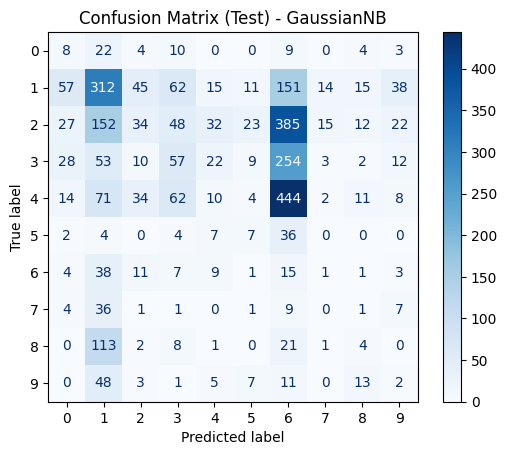

Training DecisionTreeClassifier...

Test metrics for DecisionTreeClassifier:
Accuracy: 0.1327
Precision: 0.1979
Recall: 0.1327
F1 Score: 0.1542


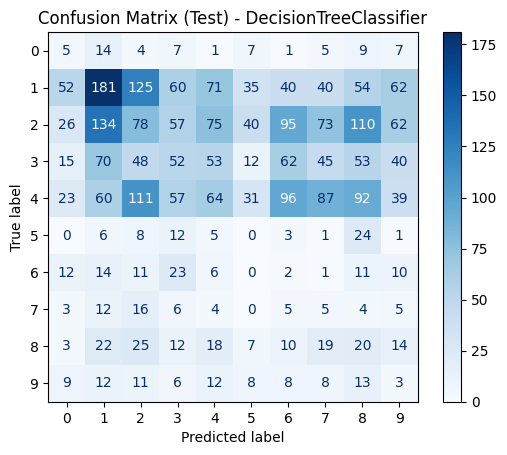

Training RandomForestClassifier...


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Test metrics for RandomForestClassifier:
Accuracy: 0.1926
Precision: 0.1947
Recall: 0.1926
F1 Score: 0.1882


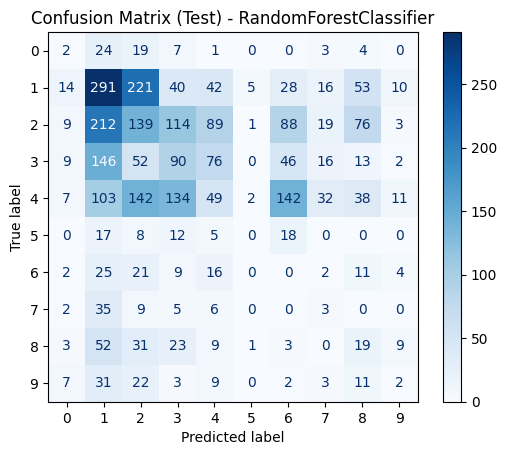

Training LogisticRegression...


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Test metrics for LogisticRegression:
Accuracy: 0.0984
Precision: 0.1621
Recall: 0.0984
F1 Score: 0.1114


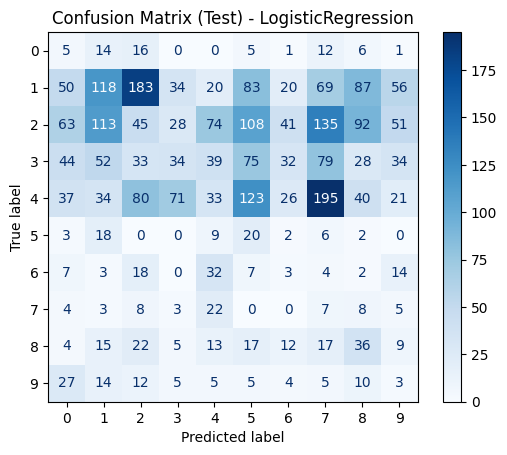

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Define classifiers
classifiers = {
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Train and test classifiers
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    clf.fit(X_pca, y_bal)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_pca)

    # Evaluate the classifier on the test set
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred, average='weighted')
    recall_test = recall_score(y_test, y_pred, average='weighted')
    f1_test = f1_score(y_test, y_pred, average='weighted')

    print(f"\nTest metrics for {clf_name}:")
    print(f"Accuracy: {accuracy_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"F1 Score: {f1_test:.4f}")

    # Plot confusion matrix for the test set
    cm_test = confusion_matrix(y_test, y_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp_test.plot(cmap='Blues', values_format='.0f')
    plt.title(f'Confusion Matrix (Test) - {clf_name}')
    plt.show()


#### Data Augmentation

In [19]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train_reshaped = X_train.reshape((X_train.shape[0], 48, 48, 1))
y_train_reshaped = y_train.reshape(-1, 1)

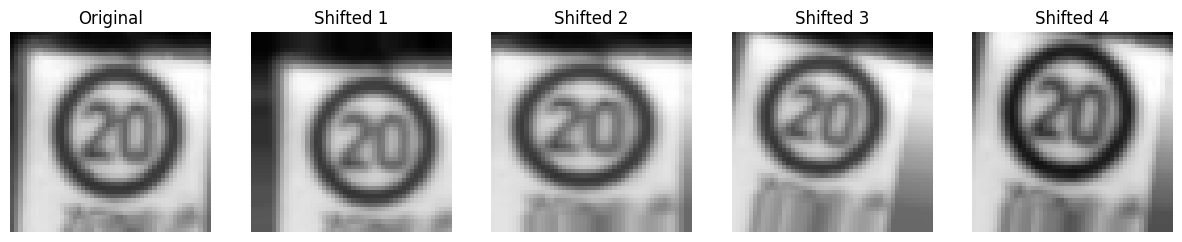

In [20]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Create an instance of the ImageDataGenerator class
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

# Display a few augmented images for illustration
img = X_train_reshaped[100]

# Reshape to (1, height, width, channels) for flow() function
img = img.reshape((1,) + img.shape)

# Generate augmented images and display them in subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Adjust the figsize as needed

# Display the original image
axes[0].imshow(np.squeeze(img[0], axis=2), cmap='gray')  # Assuming grayscale images
axes[0].axis('off')
axes[0].set_title('Original')

# Generate and display horizontally shifted images
for i, (ax, batch) in enumerate(zip(axes[1:], datagen.flow(img, batch_size=1))):
    ax.imshow(np.squeeze(batch[0], axis=2), cmap='gray')  # Assuming grayscale images
    ax.axis('off')
    ax.set_title(f'Shifted {i + 1}')

plt.show()


In [21]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Find the majority class count
majority_class_count = max(np.unique(y_train, return_counts=True)[1])

# Create an instance of ImageDataGenerator with desired augmentation settings
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

# Create a list to store augmented data and labels
augmented_data = []
augmented_labels = []

# Iterate through each class
for class_label in np.unique(y_train):
    # Find images with the current class label
    class_images = X_train_reshaped[y_train.flatten() == class_label]

    # Calculate the number of augmented images needed for the current class
    images_needed = majority_class_count - len(class_images)

    batch_size = 10

    # Generate augmented images for the current class until reaching the desired count
    while images_needed > 0:
        # Randomly select an image from the current class
        original_image = class_images[np.random.choice(len(class_images))]

        # Expand dimensions to make it compatible with datagen.flow
        x = np.expand_dims(original_image, axis=0)

        # Generate augmented images in batches
        num_batches = min(images_needed, batch_size)
        for _ in range(num_batches):
            batch = next(datagen.flow(x, batch_size=1))
            augmented_data.extend(batch)
            augmented_labels.extend([class_label])

        # Update the remaining images needed
        images_needed -= num_batches

# Convert lists to arrays
X_augmented = np.array(augmented_data)
y_augmented = np.array(augmented_labels).reshape(-1, 1)

# Combine augmented data with original data
X_aug = np.concatenate((X_train_reshaped, X_augmented), axis=0)
y_aug = np.concatenate((y_train_reshaped, y_augmented), axis=0)

# Shuffle the aug data
shuffle_indices = np.random.permutation(len(X_aug))
X_aug = X_aug[shuffle_indices]
y_aug = y_aug[shuffle_indices]

print(f'Balanced dataset with {majority_class_count} images per class has been created.')


Balanced dataset with 2250 images per class has been created.


In [22]:
unique_classes, class_counts = np.unique(y_aug, return_counts=True)
for class_label, count in zip(unique_classes, class_counts):
    print(f'Class {class_label}: {count} instances')


Class 0: 2250 instances
Class 1: 2250 instances
Class 2: 2250 instances
Class 3: 2250 instances
Class 4: 2250 instances
Class 5: 2250 instances
Class 6: 2250 instances
Class 7: 2250 instances
Class 8: 2250 instances
Class 9: 2250 instances


#### Training Classifiers on augmented data

Training GaussianNB...


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(



Test metrics for GaussianNB:
Accuracy: 0.1094
Precision: 0.3721
Recall: 0.1094
F1 Score: 0.1555


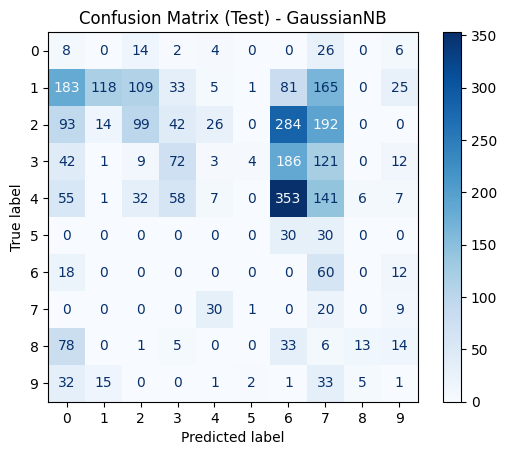

Training DecisionTreeClassifier...


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(



Test metrics for DecisionTreeClassifier:
Accuracy: 0.5657
Precision: 0.6297
Recall: 0.5657
F1 Score: 0.5902


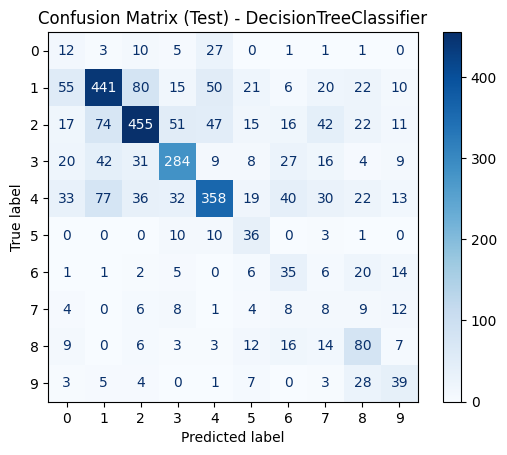

Training RandomForestClassifier...


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Test metrics for RandomForestClassifier:
Accuracy: 0.6948
Precision: 0.7171
Recall: 0.6948
F1 Score: 0.7028


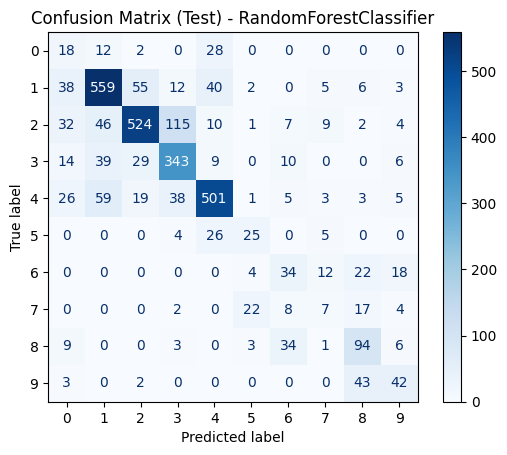

Training LogisticRegression...


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(



Test metrics for LogisticRegression:
Accuracy: 0.7589
Precision: 0.7859
Recall: 0.7589
F1 Score: 0.7690


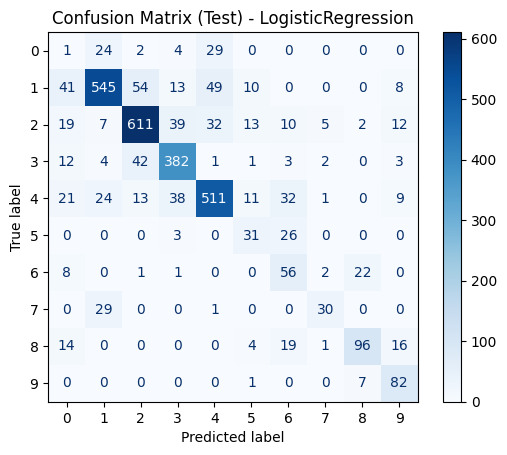

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Define classifiers
classifiers = {
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

X_aug = X_aug.reshape((22500, 2304))

# Train and test classifiers
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    clf.fit(X_aug, y_aug.flatten())

    # Make predictions on the test set
    y_test_pred = clf.predict(X_test)

    # Evaluate the classifier on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    print(f"\nTest metrics for {clf_name}:")
    print(f"Accuracy: {accuracy_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"F1 Score: {f1_test:.4f}")

    # Plot confusion matrix for the test set
    cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.unique(y_test))
    disp_test.plot(cmap='Blues', values_format='.0f')
    plt.title(f'Confusion Matrix (Test) - {clf_name}')
    plt.show()


#### CNN

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score

# Reshape the data to match CNN input requirements
X_test = np.array(X_test)
X_aug_reshaped = X_aug.reshape(22500, 48, 48, 1)
X_test_reshaped = X_test.reshape(3090, 48, 48, 1)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with history to capture training metrics
history = model.fit(X_aug_reshaped, y_aug, epochs=20, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Evaluate the model on the test set
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

test_loss, test_acc = model.evaluate(X_test_reshaped, y_test, verbose=0)
print('\nTest accuracy:', test_acc)





Epoch 1/20


352/352 [==============================] - 13s 33ms/step - loss: 0.8710 - accuracy: 0.7081 - val_loss: 0.4104 - val_accuracy: 0.8822
Epoch 2/20
352/352 [==============================] - 12s 33ms/step - loss: 0.2202 - accuracy: 0.9343 - val_loss: 0.3833 - val_accuracy: 0.8867
Epoch 3/20
352/352 [==============================] - 12s 33ms/step - loss: 0.1161 - accuracy: 0.9670 - val_loss: 0.3346 - val_accuracy: 0.9029
Epoch 4/20
352/352 [==============================] - 12s 33ms/step - loss: 0.0652 - accuracy: 0.9824 - val_loss: 0.3191 - val_accuracy: 0.9191
Epoch 5/20
352/352 [==============================] - 12s 33ms/step - loss: 0.0586 - accuracy: 0.9827 - val_loss: 0.3383 - val_accuracy: 0.9142
Epoch 6/20
352/352 [==============================] - 12s 34ms/step - loss: 0.0434 - accuracy: 0.9881 - val_loss: 0.3401 - val_accuracy: 0.9188
Epoch 7/20
352/352 [==============================] - 13s 36ms/step - loss: 0.0285 - accuracy: 0.9921 - val_loss: 0.3379 - val_accu